In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import Dataset

trainloader = Dataset.trainloader
testloader =  Dataset.testloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


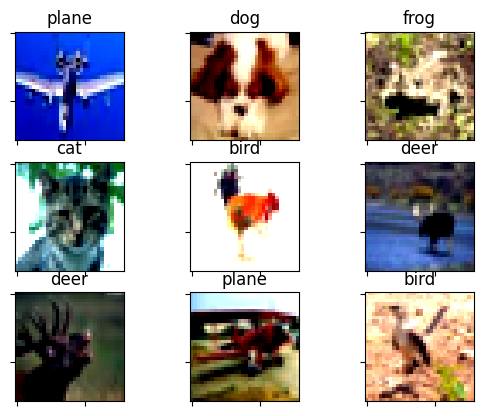

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print labels
for i in range(0,9):
 plt.subplot(3, 3, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((images[i]/2)+0.5).numpy(),(1,2,0)))
 plt.title(classes[labels[i]])

#Layer Norm

In [5]:
import Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = Net.Net('ln').to(device)
summary(net, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
         GroupNorm-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
        GroupNorm-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
          Dropout-14           [-1,

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=7, step_size_down=13, mode='triangular')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [8]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
for epoch in range(20):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


lr=  0.015142857142857156


100%|██████████| 782/782 [05:11<00:00,  2.51it/s]


Epoch= 0 Loss=1.2119141817092896 Accuracy=56.25


100%|██████████| 157/157 [00:17<00:00,  9.18it/s]


Accuracy of the network on the 10000 test images: 38 %
lr=  0.029285714285714314


100%|██████████| 782/782 [05:08<00:00,  2.53it/s]


Epoch= 1 Loss=1.145139217376709 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00,  9.92it/s]


Accuracy of the network on the 10000 test images: 43 %
lr=  0.04342857142857141


100%|██████████| 782/782 [04:52<00:00,  2.67it/s]


Epoch= 2 Loss=1.0568387508392334 Accuracy=75.00


100%|██████████| 157/157 [00:19<00:00,  8.00it/s]


Accuracy of the network on the 10000 test images: 52 %
lr=  0.05757142857142856


100%|██████████| 782/782 [04:26<00:00,  2.93it/s]


Epoch= 3 Loss=1.4622074365615845 Accuracy=62.50


100%|██████████| 157/157 [00:15<00:00, 10.14it/s]


Accuracy of the network on the 10000 test images: 59 %
lr=  0.07171428571428572


100%|██████████| 782/782 [04:29<00:00,  2.90it/s]


Epoch= 4 Loss=1.0535595417022705 Accuracy=75.00


100%|██████████| 157/157 [00:17<00:00,  8.91it/s]


Accuracy of the network on the 10000 test images: 59 %
lr=  0.08585714285714288


100%|██████████| 782/782 [04:28<00:00,  2.92it/s]


Epoch= 5 Loss=1.8752000331878662 Accuracy=37.50


100%|██████████| 157/157 [00:16<00:00,  9.48it/s]


Accuracy of the network on the 10000 test images: 60 %
lr=  0.09999999999999998


100%|██████████| 782/782 [04:20<00:00,  3.00it/s]


Epoch= 6 Loss=1.0555568933486938 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00, 10.25it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.0923846153846154


100%|██████████| 782/782 [04:17<00:00,  3.03it/s]


Epoch= 7 Loss=1.193617820739746 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00, 10.03it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.08476923076923078


100%|██████████| 782/782 [04:33<00:00,  2.85it/s]


Epoch= 8 Loss=1.0582101345062256 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00,  9.93it/s]


Accuracy of the network on the 10000 test images: 64 %
lr=  0.07715384615384616


100%|██████████| 782/782 [04:20<00:00,  3.00it/s]


Epoch= 9 Loss=0.5783476233482361 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.02it/s]


Accuracy of the network on the 10000 test images: 65 %
lr=  0.06953846153846154


100%|██████████| 782/782 [04:23<00:00,  2.97it/s]


Epoch= 10 Loss=1.033869981765747 Accuracy=75.00


100%|██████████| 157/157 [00:16<00:00,  9.74it/s]


Accuracy of the network on the 10000 test images: 65 %
lr=  0.06192307692307691


100%|██████████| 782/782 [04:28<00:00,  2.91it/s]


Epoch= 11 Loss=0.861496090888977 Accuracy=68.75


100%|██████████| 157/157 [00:16<00:00,  9.41it/s]


Accuracy of the network on the 10000 test images: 67 %
lr=  0.05430769230769232


100%|██████████| 782/782 [04:19<00:00,  3.02it/s]


Epoch= 12 Loss=0.6748741865158081 Accuracy=87.50


100%|██████████| 157/157 [00:15<00:00, 10.37it/s]


Accuracy of the network on the 10000 test images: 68 %
lr=  0.0466923076923077


100%|██████████| 782/782 [04:28<00:00,  2.91it/s]


Epoch= 13 Loss=0.8392021656036377 Accuracy=68.75


100%|██████████| 157/157 [00:16<00:00,  9.80it/s]


Accuracy of the network on the 10000 test images: 67 %
lr=  0.03907692307692308


100%|██████████| 782/782 [04:35<00:00,  2.84it/s]


Epoch= 14 Loss=0.6612943410873413 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00, 10.15it/s]


Accuracy of the network on the 10000 test images: 71 %
lr=  0.03146153846153845


100%|██████████| 782/782 [04:20<00:00,  3.01it/s]


Epoch= 15 Loss=0.5756896138191223 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.20it/s]


Accuracy of the network on the 10000 test images: 71 %
lr=  0.023846153846153833


100%|██████████| 782/782 [04:16<00:00,  3.04it/s]


Epoch= 16 Loss=0.7992961406707764 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.31it/s]


Accuracy of the network on the 10000 test images: 73 %
lr=  0.016230769230769243


100%|██████████| 782/782 [04:15<00:00,  3.06it/s]


Epoch= 17 Loss=0.9852582216262817 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00,  9.90it/s]


Accuracy of the network on the 10000 test images: 73 %
lr=  0.008615384615384622


100%|██████████| 782/782 [04:17<00:00,  3.04it/s]


Epoch= 18 Loss=0.6093953251838684 Accuracy=87.50


100%|██████████| 157/157 [00:15<00:00, 10.28it/s]


Accuracy of the network on the 10000 test images: 74 %
lr=  0.001


100%|██████████| 782/782 [04:14<00:00,  3.07it/s]


Epoch= 19 Loss=0.7271313667297363 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00, 10.44it/s]

Accuracy of the network on the 10000 test images: 74 %
Finished Training


Text(0, 0.5, 'Accuracy')

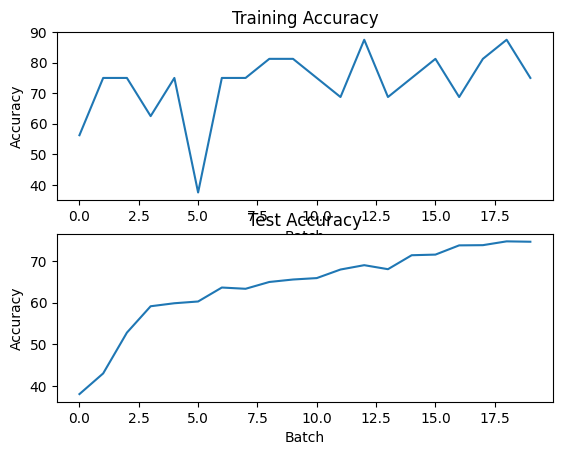

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

  0%|          | 0/157 [00:00<?, ?it/s]


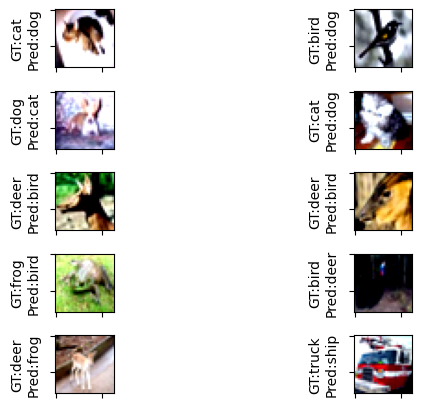

In [12]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.numpy()
           predicted1 = predicted.numpy()
           for i in range(64):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]]/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))



In [4]:
import Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = Net.Net('gn').to(device)
summary(net, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
         GroupNorm-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
        GroupNorm-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
          Dropout-14           [-1,

In [5]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=7, step_size_down=13, mode='triangular')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [6]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
for epoch in range(20):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


lr=  0.015142857142857156


100%|██████████| 782/782 [04:32<00:00,  2.87it/s]


Epoch= 0 Loss=1.2630243301391602 Accuracy=62.50


100%|██████████| 157/157 [00:15<00:00, 10.20it/s]


Accuracy of the network on the 10000 test images: 35 %
lr=  0.029285714285714314


100%|██████████| 782/782 [04:27<00:00,  2.92it/s]


Epoch= 1 Loss=1.634217381477356 Accuracy=43.75


100%|██████████| 157/157 [00:15<00:00,  9.84it/s]


Accuracy of the network on the 10000 test images: 40 %
lr=  0.04342857142857141


100%|██████████| 782/782 [04:23<00:00,  2.97it/s]


Epoch= 2 Loss=1.2483266592025757 Accuracy=56.25


100%|██████████| 157/157 [00:15<00:00, 10.10it/s]


Accuracy of the network on the 10000 test images: 51 %
lr=  0.05757142857142856


100%|██████████| 782/782 [04:31<00:00,  2.88it/s]


Epoch= 3 Loss=0.944674015045166 Accuracy=87.50


100%|██████████| 157/157 [00:16<00:00,  9.72it/s]


Accuracy of the network on the 10000 test images: 55 %
lr=  0.07171428571428572


100%|██████████| 782/782 [04:35<00:00,  2.84it/s]


Epoch= 4 Loss=0.5985270738601685 Accuracy=75.00


100%|██████████| 157/157 [00:15<00:00, 10.01it/s]


Accuracy of the network on the 10000 test images: 62 %
lr=  0.08585714285714288


100%|██████████| 782/782 [04:36<00:00,  2.83it/s]


Epoch= 5 Loss=0.6158997416496277 Accuracy=87.50


100%|██████████| 157/157 [00:15<00:00, 10.16it/s]


Accuracy of the network on the 10000 test images: 56 %
lr=  0.09999999999999998


100%|██████████| 782/782 [04:34<00:00,  2.85it/s]


Epoch= 6 Loss=0.7555462718009949 Accuracy=75.00


100%|██████████| 157/157 [00:16<00:00,  9.47it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.0923846153846154


100%|██████████| 782/782 [04:36<00:00,  2.83it/s]


Epoch= 7 Loss=0.8765797019004822 Accuracy=81.25


100%|██████████| 157/157 [00:16<00:00,  9.56it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.08476923076923078


100%|██████████| 782/782 [04:31<00:00,  2.88it/s]


Epoch= 8 Loss=0.8643743991851807 Accuracy=87.50


100%|██████████| 157/157 [00:15<00:00,  9.92it/s]


Accuracy of the network on the 10000 test images: 68 %
lr=  0.07715384615384616


100%|██████████| 782/782 [04:32<00:00,  2.87it/s]


Epoch= 9 Loss=0.9391622543334961 Accuracy=62.50


100%|██████████| 157/157 [00:16<00:00,  9.75it/s]


Accuracy of the network on the 10000 test images: 67 %
lr=  0.06953846153846154


100%|██████████| 782/782 [04:31<00:00,  2.88it/s]


Epoch= 10 Loss=1.2419854402542114 Accuracy=87.50


100%|██████████| 157/157 [00:17<00:00,  8.93it/s]


Accuracy of the network on the 10000 test images: 68 %
lr=  0.06192307692307691


100%|██████████| 782/782 [04:39<00:00,  2.80it/s]


Epoch= 11 Loss=1.0019303560256958 Accuracy=81.25


100%|██████████| 157/157 [00:17<00:00,  8.98it/s]


Accuracy of the network on the 10000 test images: 71 %
lr=  0.05430769230769232


100%|██████████| 782/782 [04:40<00:00,  2.78it/s]


Epoch= 12 Loss=0.48173630237579346 Accuracy=75.00


100%|██████████| 157/157 [00:17<00:00,  8.96it/s]


Accuracy of the network on the 10000 test images: 72 %
lr=  0.0466923076923077


100%|██████████| 782/782 [04:41<00:00,  2.78it/s]


Epoch= 13 Loss=0.9216927289962769 Accuracy=62.50


100%|██████████| 157/157 [00:16<00:00,  9.57it/s]


Accuracy of the network on the 10000 test images: 70 %
lr=  0.03907692307692308


100%|██████████| 782/782 [04:33<00:00,  2.86it/s]


Epoch= 14 Loss=1.1478474140167236 Accuracy=75.00


100%|██████████| 157/157 [00:16<00:00,  9.70it/s]


Accuracy of the network on the 10000 test images: 71 %
lr=  0.03146153846153845


100%|██████████| 782/782 [04:32<00:00,  2.87it/s]


Epoch= 15 Loss=0.4722219705581665 Accuracy=87.50


100%|██████████| 157/157 [00:16<00:00,  9.79it/s]


Accuracy of the network on the 10000 test images: 73 %
lr=  0.023846153846153833


100%|██████████| 782/782 [04:21<00:00,  2.99it/s]


Epoch= 16 Loss=0.7791983485221863 Accuracy=75.00


100%|██████████| 157/157 [00:16<00:00,  9.56it/s]


Accuracy of the network on the 10000 test images: 72 %
lr=  0.016230769230769243


100%|██████████| 782/782 [04:25<00:00,  2.94it/s]


Epoch= 17 Loss=0.6688603758811951 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.11it/s]


Accuracy of the network on the 10000 test images: 74 %
lr=  0.008615384615384622


100%|██████████| 782/782 [04:20<00:00,  3.00it/s]


Epoch= 18 Loss=0.9913939833641052 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.34it/s]


Accuracy of the network on the 10000 test images: 76 %
lr=  0.001


100%|██████████| 782/782 [04:22<00:00,  2.98it/s]


Epoch= 19 Loss=0.5931732058525085 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.33it/s]

Accuracy of the network on the 10000 test images: 76 %
Finished Training


Text(0, 0.5, 'Accuracy')

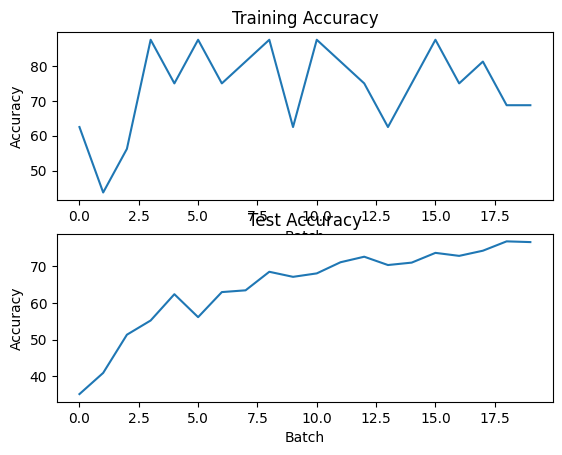

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

  0%|          | 0/157 [00:00<?, ?it/s]


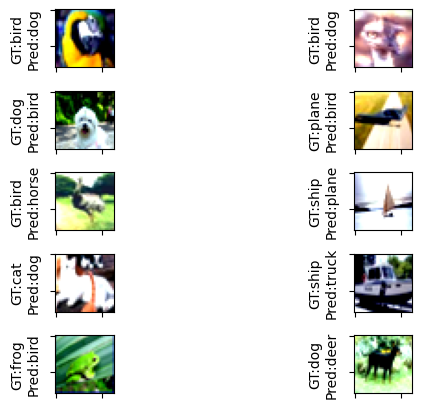

In [9]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.numpy()
           predicted1 = predicted.numpy()
           for i in range(64):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]]/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))



In [10]:
import Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = Net.Net('bn').to(device)
summary(net, input_size=(3, 32, 32))

cpu
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
####Batch Norm
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
      BatchNorm2d-12           [-1, 16, 16,

In [11]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=7, step_size_down=13, mode='triangular')
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [12]:
import torch
from tqdm import tqdm
import traine, teste
#import test
test_acc = []
train_acc = []
for epoch in range(20):  # loop over the dataset multiple times
    scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(traine.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(teste.test(net, device, testloader))
print('Finished Training')

lr=  0.015142857142857156


100%|██████████| 782/782 [04:41<00:00,  2.78it/s]


Epoch= 0 Loss=0.8430328369140625 Accuracy=68.75


100%|██████████| 157/157 [00:14<00:00, 10.78it/s]


Accuracy of the network on the 10000 test images: 45 %
lr=  0.029285714285714314


100%|██████████| 782/782 [04:40<00:00,  2.78it/s]


Epoch= 1 Loss=1.3134775161743164 Accuracy=56.25


100%|██████████| 157/157 [00:14<00:00, 10.56it/s]


Accuracy of the network on the 10000 test images: 58 %
lr=  0.04342857142857141


100%|██████████| 782/782 [04:49<00:00,  2.70it/s]


Epoch= 2 Loss=1.3945670127868652 Accuracy=56.25


100%|██████████| 157/157 [00:14<00:00, 10.56it/s]


Accuracy of the network on the 10000 test images: 49 %
lr=  0.05757142857142856


100%|██████████| 782/782 [04:44<00:00,  2.75it/s]


Epoch= 3 Loss=1.0571390390396118 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.10it/s]


Accuracy of the network on the 10000 test images: 49 %
lr=  0.07171428571428572


100%|██████████| 782/782 [04:47<00:00,  2.72it/s]


Epoch= 4 Loss=1.0267280340194702 Accuracy=75.00


100%|██████████| 157/157 [00:14<00:00, 10.60it/s]


Accuracy of the network on the 10000 test images: 53 %
lr=  0.08585714285714288


100%|██████████| 782/782 [04:47<00:00,  2.72it/s]


Epoch= 5 Loss=0.8205463290214539 Accuracy=75.00


100%|██████████| 157/157 [00:14<00:00, 10.48it/s]


Accuracy of the network on the 10000 test images: 54 %
lr=  0.09999999999999998


100%|██████████| 782/782 [04:48<00:00,  2.71it/s]


Epoch= 6 Loss=0.8007985353469849 Accuracy=75.00


100%|██████████| 157/157 [00:14<00:00, 10.53it/s]


Accuracy of the network on the 10000 test images: 59 %
lr=  0.0923846153846154


100%|██████████| 782/782 [04:50<00:00,  2.70it/s]


Epoch= 7 Loss=0.5870991349220276 Accuracy=87.50


100%|██████████| 157/157 [00:15<00:00, 10.24it/s]


Accuracy of the network on the 10000 test images: 60 %
lr=  0.08476923076923078


100%|██████████| 782/782 [04:46<00:00,  2.73it/s]


Epoch= 8 Loss=0.9085004329681396 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.25it/s]


Accuracy of the network on the 10000 test images: 66 %
lr=  0.07715384615384616


100%|██████████| 782/782 [04:47<00:00,  2.72it/s]


Epoch= 9 Loss=0.5721858739852905 Accuracy=93.75


100%|██████████| 157/157 [00:15<00:00, 10.32it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.06953846153846154


100%|██████████| 782/782 [04:46<00:00,  2.73it/s]


Epoch= 10 Loss=0.5883209109306335 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.23it/s]


Accuracy of the network on the 10000 test images: 67 %
lr=  0.06192307692307691


100%|██████████| 782/782 [04:48<00:00,  2.71it/s]


Epoch= 11 Loss=1.2473816871643066 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.11it/s]


Accuracy of the network on the 10000 test images: 65 %
lr=  0.05430769230769232


100%|██████████| 782/782 [04:52<00:00,  2.67it/s]


Epoch= 12 Loss=0.31454506516456604 Accuracy=100.00


100%|██████████| 157/157 [00:15<00:00, 10.26it/s]


Accuracy of the network on the 10000 test images: 68 %
lr=  0.0466923076923077


100%|██████████| 782/782 [04:54<00:00,  2.65it/s]


Epoch= 13 Loss=0.4099386930465698 Accuracy=93.75


100%|██████████| 157/157 [00:15<00:00, 10.26it/s]


Accuracy of the network on the 10000 test images: 63 %
lr=  0.03907692307692308


100%|██████████| 782/782 [04:50<00:00,  2.70it/s]


Epoch= 14 Loss=0.9768697619438171 Accuracy=81.25


100%|██████████| 157/157 [00:15<00:00, 10.22it/s]


Accuracy of the network on the 10000 test images: 71 %
lr=  0.03146153846153845


100%|██████████| 782/782 [04:52<00:00,  2.67it/s]


Epoch= 15 Loss=1.1412819623947144 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.28it/s]


Accuracy of the network on the 10000 test images: 72 %
lr=  0.023846153846153833


100%|██████████| 782/782 [04:54<00:00,  2.65it/s]


Epoch= 16 Loss=0.5008542537689209 Accuracy=68.75


100%|██████████| 157/157 [00:15<00:00, 10.02it/s]


Accuracy of the network on the 10000 test images: 72 %
lr=  0.016230769230769243


100%|██████████| 782/782 [04:52<00:00,  2.67it/s]


Epoch= 17 Loss=0.62432861328125 Accuracy=93.75


100%|██████████| 157/157 [00:15<00:00, 10.39it/s]


Accuracy of the network on the 10000 test images: 73 %
lr=  0.008615384615384622


100%|██████████| 782/782 [04:49<00:00,  2.71it/s]


Epoch= 18 Loss=0.728442370891571 Accuracy=68.75


100%|██████████| 157/157 [00:14<00:00, 10.49it/s]


Accuracy of the network on the 10000 test images: 73 %
lr=  0.001


100%|██████████| 782/782 [04:55<00:00,  2.64it/s]


Epoch= 19 Loss=0.5814083218574524 Accuracy=87.50


100%|██████████| 157/157 [00:16<00:00,  9.41it/s]


Accuracy of the network on the 10000 test images: 75 %
Finished Training


Text(0, 0.5, 'Accuracy')

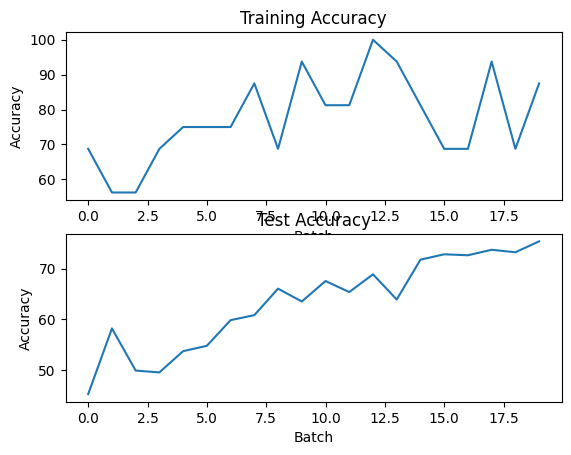

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

  0%|          | 0/157 [00:00<?, ?it/s]


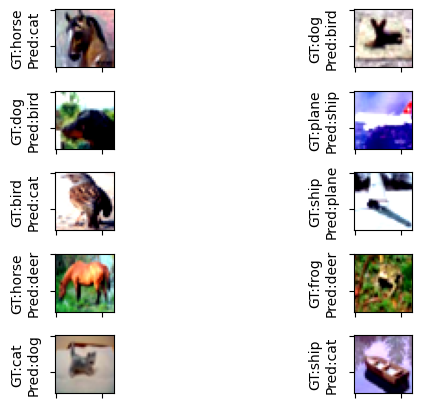

In [14]:
from tqdm import tqdm
net.eval()
missed = []
with torch.no_grad():
      pbar1 = tqdm(testloader)
      for i, (data, target) in enumerate(pbar1):
           data, target = data.to(device), target.to(device)
           outputs = net(data)
           _, predicted = torch.max(outputs.data, 1)
           target1 = target.numpy()
           predicted1 = predicted.numpy()
           for i in range(64):
              if target1[i]!=predicted1[i]:
                 missed.append(i)
           break

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(0,10):
 plt.subplot(5, 2, i+1)
 frame1 = plt.gca()
 frame1.axes.xaxis.set_ticklabels([])
 frame1.axes.yaxis.set_ticklabels([])
 plt.imshow(np.transpose(((data[missed[i]]/2)+0.5).numpy(),(1,2,0)))
 plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))